### Imports

In [11]:
from sklearn import preprocessing

from dataset import *
from models.base_model import *
from models.neural_net import *
from models.sampled_net import *
from viewer.visualizer import *
from logic import *
import dataset
import models.base_model
import models.neural_net
import models.sampled_net
import viewer.visualizer
import logic

import importlib

importlib.reload(dataset)
importlib.reload(models.base_model)
importlib.reload(models.neural_net)
importlib.reload(models.sampled_net)
importlib.reload(viewer.visualizer)
importlib.reload(logic)

<module 'logic' from 'c:\\Users\\daydo\\OneDrive\\Dokumente\\temp-sampled\\sampled-networks\\logic.py'>

### Dataset creation

In [12]:
xd = 3  # Input space dimensions
yd = 4  # Output dimension
num_samples = 1000  # Number of data points
epochs = 100  # Number of training epochs
l = [200]  # Number of neurons in each layer


dataset = Dataset()
dataset.create_dataset_Barron(xd, num_samples)
dataset.scale(preprocessing.MinMaxScaler())
dataset.split_train_test(0.2)

### Neural Network training with Adam

In [13]:
model_nn = NeuralNet()
model_nn.fit(dataset.X_train, dataset.y_train, l, validation_split=0.2, epochs=epochs)

### Sampled Netwrok training with ridge, and losses comparaison

In [20]:
y_nn_train = model_nn.predict(dataset.X_train)

model_sampled = SampledNet()
alpha, radius = model_sampled.fit(dataset.X_train, y_nn_train, model_nn, layer2="ridge", radius=0, alpha=-1)

y_sampled_test = model_sampled.predict(dataset.X_test)
y_sampled_train = model_sampled.predict(dataset.X_train)
y_nn_test = model_nn.predict(dataset.X_test)

print(f"mse: y_test, y_nn_test           {loss_mse(y_nn_test, dataset.y_test)}")
print(f"mse: y_test, y_sampled_test      {loss_mse(y_sampled_test, dataset.y_test)}")
print(f"mse: y_sampled_train, y_nn_train {loss_mse(y_sampled_train, y_nn_train)}")
print(f"mse: y_sampled_test,  y_nn_test  {loss_mse(y_sampled_test, y_nn_test)}")

Layer1 sampling: 100%|██████████| 200/200 [00:00<00:00, 3669.46it/s]

alpha 	loss validation
0.0001 	1.882e-04
0.001 	1.872e-04
0.01 	1.860e-04
0.1 	2.096e-04
1 	3.324e-04
10 	1.097e-03
100 	4.747e-03
mse: y_test, y_nn_test           0.005470226627641834
mse: y_test, y_sampled_test      0.005180978617488551
mse: y_sampled_train, y_nn_train 0.00011488495102181972
mse: y_sampled_test,  y_nn_test  0.0001967182981039768


### Plot the weights' angles differences, and prediction vs actual visualization

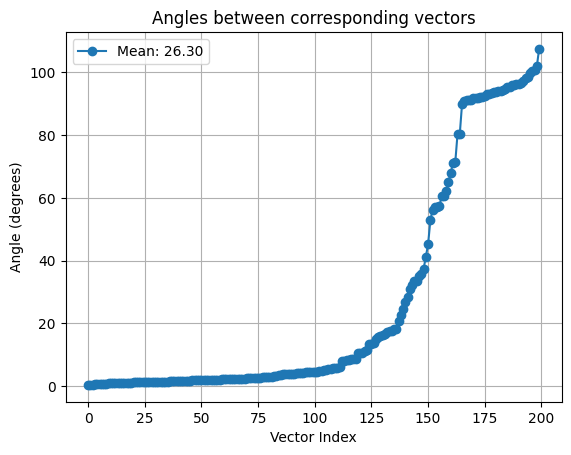

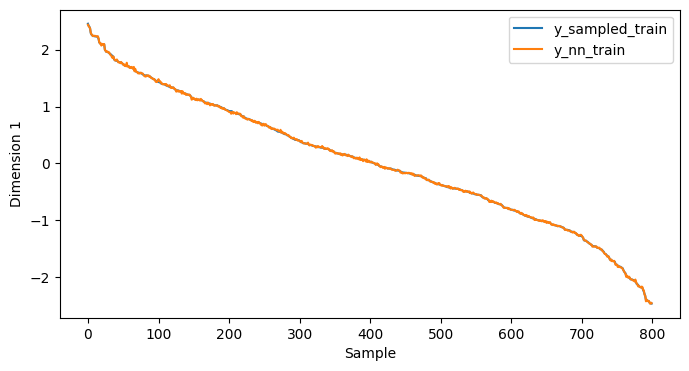

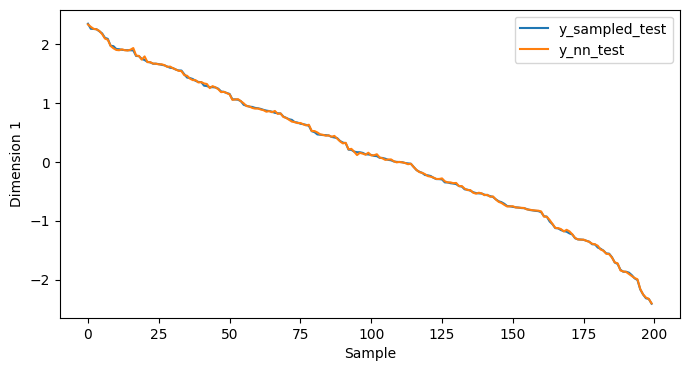

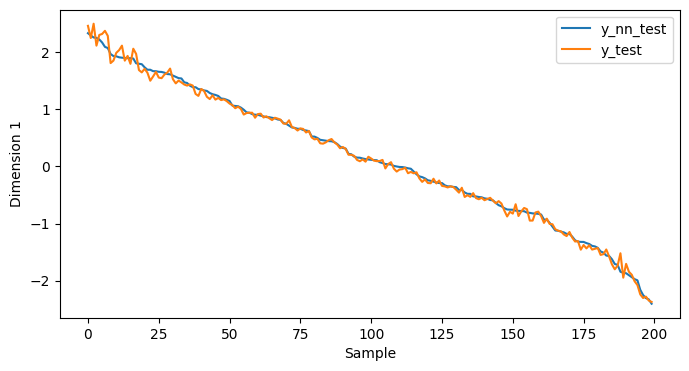

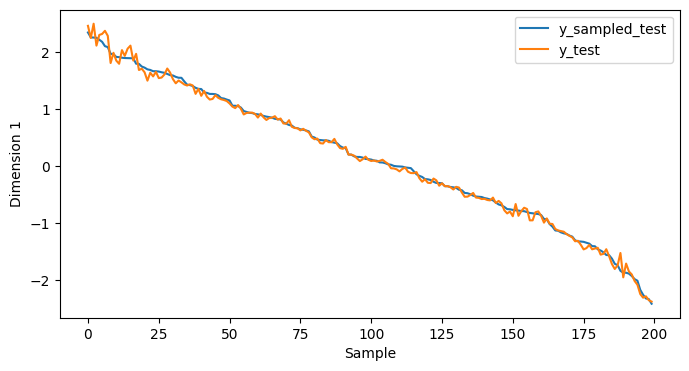

In [21]:
plot_vector_differences([model_nn.weights[0]], [model_sampled.weights[0]])
visualize_data(y_sampled_train, y_nn_train, "y_sampled_train", "y_nn_train")
visualize_data(y_sampled_test, y_nn_test, "y_sampled_test", "y_nn_test")
visualize_data(y_nn_test, dataset.y_test, "y_nn_test", "y_test")
visualize_data(y_sampled_test, dataset.y_test, "y_sampled_test", "y_test")

### Calculate loss vs alpha, radius.

In [22]:
y_nn_train = model_nn.predict(dataset.X_train)
y_nn_test = model_nn.predict(dataset.X_test)
weight1 = []
weight2 = []
losses = []
radii = np.linspace(0, 1, 10)
for radius in radii:
    model_sampled = SampledNet()
    alpha, radius = model_sampled.fit(
        dataset.X_train, y_nn_train, model_nn, layer2="ridge", radius=radius, alpha=-1, verbose=0
    )
    weight1.append(model_sampled.weights[0])
    weight2.append(model_nn.weights[0])
    y_sampled_test = model_sampled.predict(dataset.X_test)
    loss_sampled_nn = loss_mse(y_sampled_test, y_nn_test)
    losses.append(loss_sampled_nn)
    print(loss_sampled_nn)

Layer1 sampling: 100%|██████████| 200/200 [00:00<00:00, 4299.18it/s]


0.0002455822071257029


Layer1 sampling: 100%|██████████| 200/200 [00:01<00:00, 134.37it/s]


0.00022072571958822398


Layer1 sampling: 100%|██████████| 200/200 [00:02<00:00, 69.03it/s]


0.0002724778564616777


Layer1 sampling: 100%|██████████| 200/200 [00:04<00:00, 43.27it/s]


0.0005420093407968368


Layer1 sampling: 100%|██████████| 200/200 [00:06<00:00, 31.86it/s]


0.0005470814911501551


Layer1 sampling: 100%|██████████| 200/200 [00:08<00:00, 23.08it/s]


0.0004404856750221452


Layer1 sampling: 100%|██████████| 200/200 [00:09<00:00, 21.14it/s]


0.0004877868517443308


Layer1 sampling: 100%|██████████| 200/200 [00:10<00:00, 18.73it/s]


0.00036152844472908495


Layer1 sampling: 100%|██████████| 200/200 [00:12<00:00, 15.94it/s]


0.00042708938526139274


Layer1 sampling: 100%|██████████| 200/200 [00:13<00:00, 14.60it/s]

0.00032003515748302535


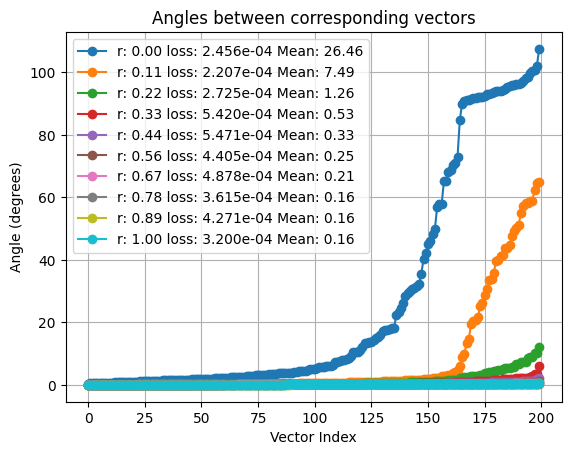

In [23]:
plot_vector_differences(weight1, weight2, radii, losses)